## Hopfield network
### Theoretical background
A Hopfield Network is a type of recurrent neural network composed of interconnected neurons, or nodes, which can have binary states, typically +1 and -1 (or alternatively, 1 and 0). Each neuron represents an element of memory or a specific pattern. In this fully connected network, every neuron connects to every other neuron include itself, with self-connections often set to zero. The connections between neurons are assigned weights, which are usually binary values of +1 or -1, indicating the strength of the association between them.

An important feature of a Hopfield Network is its energy function, which helps the network determine its state. As the network approaches a stable state—one that corresponds to a stored pattern or set of patterns—its energy level decreases. The network updates its states in discrete time steps, influenced by the states of the neurons to which each is connected. Typically, neurons update their states according to a simple rule, like the McCulloch-Pitts model, either asynchronously (one neuron at a time) or sequentially, until the network reaches a stable state.

**The Architecture of a Hopfield Network:**
The Hopfield network architecture consists of the following components:
* Each node retains its current state until an update is required.
* Nodes are updated one at a time, selected randomly.
* Every node is connected to all other nodes, except itself.
* Each node can have a state of either 0 and 1, or +1 and -1.
Below is an illustration of a Hopfield network with a three-node example architecture:

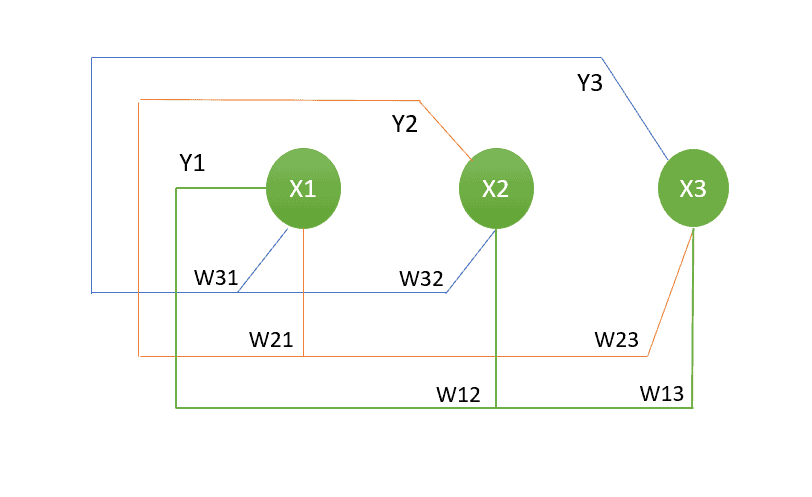 

Each symbol in the diagram above denotes:

* $x_1$, $x_2$ , and $x_3$  stand in for the input.
* Each node’s output is represented by the numbers $y_1$ , $y_2$ , and $y_3$ .
* $W_{ij}$ is a symbol for the weight of the link between $i$ and $j$.

**Training A Hopfield Network:**

Typically, the Hopfield network learning rule for updating connection weights to store patterns is defined as follows:
$${\displaystyle Wij={\frac {1}{N}}\sum _{\mu=1}^{P}x_i^{\mu}x_j^{\mu}}$$
In this formula:
* $W_{ij}$ represents the weight between neuron $i$ and neuron $j$.
* $N$ is the total number of neurons in the network.
* $P$ is the number of patterns to be stored.
* $x_i^\mu$ and $x_j^\mu$ are the states of neurons $i$ and $j$ in the $μ-th$ pattern, where $μ$ ranges from $1$ to $P$.

**Applications:**

* Pattern Recognition: Identifying patterns accurately, even with incomplete or noisy inputs.
* Image Restoration: Reconstructing corrupted or missing parts of images.
Optimization: Solving optimization problems, such as the traveling salesman problem.
Content-Addressable Memory: Accessing information based on content rather than address.

**Advantages:**

* Simplicity and Robustness: Straightforward to implement and resistant to noise.
* Associative Memory: Capable of recalling patterns even with partial or noisy inputs.
* Energy Minimization: Provides a clear objective function, aiding in training and analysis.

**Disadvantages:**
* Limited Storage Capacity: Can only store a finite number of patterns before interference occurs.
* Susceptibility to Spurious States: May converge on unwanted local minima.
Not Suited for Complex Tasks: Has limitations with sequential or temporal data.
In essence, a Hopfield network is an effective tool for pattern storage and retrieval, highlighting the potential of neural networks in solving real-world problems.

### Implemenation in Python

**Import modules**

In [17]:
import numpy as np
import random

class HopfieldNetwork:
    def __init__(self, num_neurons):
        self.num_neurons = num_neurons
        self.weights = np.zeros((num_neurons, num_neurons))
    
    def train(self, patterns):
        """
        Train the Hopfield Network using a set of patterns.
        
        Parameters:
        - patterns: list of numpy arrays, where each array is a pattern with binary values (+1 or -1)
        """
        for pattern in patterns:
            self.weights += np.outer(pattern, pattern)
        
        # Remove self-connections
        np.fill_diagonal(self.weights, 0)
        self.weights /= len(patterns)
    
    def recall(self, input_pattern, max_iterations=100):
        """
        Attempt to recall a stored pattern from a given input by updating asynchronously.
        
        Parameters:
        - input_pattern: numpy array, the initial pattern to start with
        - max_iterations: int, maximum number of updates
        
        Returns:
        - The pattern recalled from the network.
        """
        state = input_pattern.copy()
        for _ in range(max_iterations):
            # Choose a random neuron to update
            i = random.randint(0, self.num_neurons - 1)
            # Update the state of the chosen neuron
            state[i] = 1 if np.dot(self.weights[i], state) > 0 else -1
        return state
    
    def match_pattern(self, input_pattern, patterns):
        """
        Finds the closest matching stored pattern for a given input pattern.
        
        Parameters:
        - input_pattern: numpy array, the pattern to match
        - patterns: list of numpy arrays, stored patterns in the network
        
        Returns:
        - The closest matching pattern and its index in the stored patterns.
        """
        # Recall the pattern from the network
        recalled_pattern = self.recall(input_pattern)
        
        # Find the best match by comparing with each stored pattern
        best_match = None
        best_match_index = -1
        max_similarity = -float('inf')
        
        for i, pattern in enumerate(patterns):
            # Calculate similarity (number of matching elements)
            similarity = np.sum(recalled_pattern == pattern)
            if similarity > max_similarity:
                max_similarity = similarity
                best_match = pattern
                best_match_index = i
                
        return best_match, best_match_index


# Example usage
patterns = [
    np.array([1, 1, 1]),
    np.array([1, -1, -1]),
    np.array([-1, -1, -1])
]

# Initialize and train the network
network = HopfieldNetwork(num_neurons=3)
network.train(patterns)

# Input pattern for matching (can be a noisy version of one of the stored patterns)
input_pattern = np.array([1, -1, 1])  # Example noisy pattern

# Find the closest matching pattern
closest_pattern, closest_index = network.match_pattern(input_pattern, patterns)

print("Input pattern:", input_pattern)
print("Closest matching stored pattern:", closest_pattern)
print("Index of closest matching pattern:", closest_index)

Input pattern: [ 1 -1  1]
Closest matching stored pattern: [1 1 1]
Index of closest matching pattern: 0


## Explanation
**Matching Algorithm:**

* The recall method is used to bring the input pattern to a stable state.
* The match_pattern method then compares the recalled pattern to each stored pattern, measuring similarity by counting the number of matching elements.
* The pattern with the highest similarity is considered the closest match.

**Output:**
* The output shows the input pattern, the closest matching stored pattern, and its index. This gives an idea of how well the input matches the stored patterns, even if it is noisy.

**Example Output**

For a noisy input pattern, the network will ideally match it to the closest stored pattern, showing the robustness of the Hopfield network in retrieving patterns despite imperfections in input.